

----------------------------------------------------------------------


Welcome to the Backtesting script created using Backtesting Library in Python

Created 2019 by Manoj Shenoy

Old File removed!


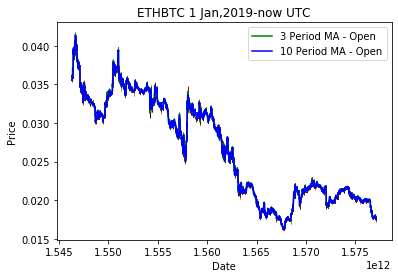

New Historical Data File saved 


New Historical Data File saved 


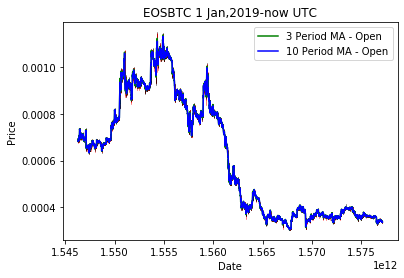

New Historical Data File saved 


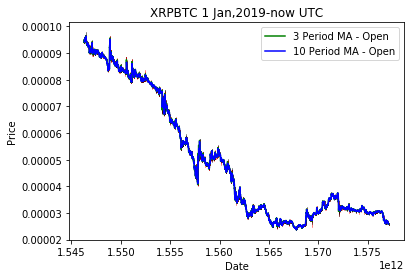

New Historical Data File saved 
======================= MA Bands Strategy =============================


[========================================================================] 100%


Start                              0
End                            34132
Duration                       34132
Exposure [%]                 99.0918
Equity Final [$]             221.592
Equity Peak [$]              10911.7
Return [%]                  -97.7841
Buy & Hold Return [%]        50.9672
Max. Drawdown [%]           -98.0139
Avg. Drawdown [%]           -1.28451
Max. Drawdown Duration           299
Avg. Drawdown Duration       47.1429
# Trades                        1854
Win Rate [%]                 16.5588
Best Trade [%]               24.6608
Worst Trade [%]             -6.47569
Avg. Trade [%]             -0.201181
Max. Trade Duration              489
Avg. Trade Duration          18.2427
Expectancy [%]              0.588011
SQN                          -5.6108
Sharpe Ratio               -0.174231
Sortino Ratio               -0.46376
Calmar Ratio             -0.00205257
_strategy                    MABands
dtype: object


In [93]:
# Backtesting All Strategies
# Write seperate classes for each strategy
from backtesting import Strategy,Backtest
from backtesting.test import SMA, GOOG
from backtesting.lib import crossover
import pandas as pd
import numpy as np
import mpl_finance
import progressbar
import csv; import datetime; import pytz
# from technical_indicators import DONCH
from technical_indicators import ADX
import sys,os
from binance.client import Client
import time
import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
from binance.enums import *

import site
site.addsitedir(r'C:\\Users\\Admin\\python-binance-master\\examples')

import save_historical_data_Roibal
from BinanceKeys import BinanceKey1
# import technical_indicators

api_key = BinanceKey1['api_key']
api_secret = BinanceKey1['api_secret']
client = Client(api_key, api_secret)

watch_list=['ETHBTC','ADABTC','EOSBTC','XRPBTC']
# import sys
# sys.path.append('C:/Users/shenoym/cryptostrategy')

# from historical_data import exchange_data,write_to_csv,to_unix_time
import historical_data
# import backtest
import warnings
warnings.filterwarnings('ignore')

# ==========Initial trade parameters =============
# symbol = 'BTC/USD'
# timeframe = '4h'
# exchange='kraken'
# trading_qty = 1.0
# trn_cost = 0.0016       # === Transaction cost = 0.26%
# slippage = 0.001        # === Slippage = 0.1%
# borrow_cost = 0.0026    # === Assuming every short trade is 100
# since = '2017-01-01 00:00:00'
# hist_start_date = int(historical_data.to_unix_time(since))
header = ['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume']

start_date="1 Jan,2019"
kline=Client.KLINE_INTERVAL_15MINUTE

print("\n\n----------------------------------------------------------------------\n\n")
print("Welcome to the Backtesting script created using Backtesting Library in Python\n")
print('Created 2019 by Manoj Shenoy\n')

def progress():
    bar = progressbar.ProgressBar(maxval=20, \
        widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
    bar.start()
    for i in range(20):
        bar.update(i+1)
        time.sleep(0.1)
    bar.finish()

def remove_files(csv):
    os.remove(csv)
    print('Old File removed!')
    
def save_coin_files(start_date,kline):
    for symbol in watch_list:
        save_historical_data_Roibal.save_historic_klines_csv(symbol, start_date, "now UTC", kline)    
        print('{}-Historical Data File saved '.format(symbol))

def read_coin_files(csv):
    read_data=pd.read_csv(csv, delimiter=',', encoding="utf-8-sig")
    reqd_data=read_data.iloc[:,1:]
    reqd_data.rename(columns={' Open':'Open', ' High':'High', ' Low' : 'Low', ' Close': 'Close', ' Volume': 'Volume'},
                    inplace=True)
#     print(reqd_data.columns)
    return reqd_data

remove_files(csv='Binance_ETHBTC.txt')
save_coin_files(start_date=start_date,kline=kline)       
data_eth = read_coin_files(csv='Binance_ETHBTC.txt')


#Donchian Channel
def DONCH(df, n):

    Upper_DC = pd.Series(df).rolling(window=n).max().fillna(0)
    Lower_DC = pd.Series(df).rolling(window=n).min().fillna(0)
    Upper_DC=Upper_DC.shift(1)
    Lower_DC=Lower_DC.shift(1)

    return Upper_DC, Lower_DC

# kraken = historical_data.exchange_data(exchange=exchange,
#                        symbol=symbol,
#                        timeframe=timeframe, since=hist_start_date)
# historical_data.write_to_csv(kraken, symbol, exchange)
# dat = pd.DataFrame(kraken, columns=header)

# MACD
n_fast,n_slow=48,100
def MACD(df, signal_line):
    EMAfast = pd.Series(df).rolling(window=n_fast).mean()
    EMAslow = pd.Series(df).rolling(window=n_slow).mean()
    MACD = pd.Series(EMAfast - EMAslow, name = 'MACD')
    MACDsign = pd.Series(MACD.rolling(window= signal_line).mean(), name = 'MACDsign')
    MACDdiff = pd.Series(MACD - MACDsign, name = 'MACDdiff')
#     df = df.join(MACD)
#     df = df.join(MACDsign)
#     df = df.join(MACDdiff)
    return MACD

# def pivot(df):
#     h = pd.Series(df['High'])  # current high
#     l = pd.Series(df['Low'])  # current high
#     c = pd.Series(df['Close'])  # current high

#     p = (h + l + c) / 3.0

#     p2 = p * 2.0
#     s1 = p2 - h  # (p x 2) - high
#     r1 = p2 - l  # (p x 2) - low

#     hilo = h - l
#     s2 = p - hilo  # p - (high - low)
#     r2 = p + hilo  # p + (high - low)
    
#     return p

#Average Directional Movement Index
def ADX(df, n_ADX):
    i = 0
    UpI = []
    DoI = []
    while i + 1 <= df.index[-1]:
        UpMove = df.get_value(i + 1, 'High') - df.get_value(i, 'High')
        DoMove = df.get_value(i, 'Low') - df.get_value(i + 1, 'Low')
        if UpMove > DoMove and UpMove > 0:
            UpD = UpMove
        else: UpD = 0
        UpI.append(UpD)
        if DoMove > UpMove and DoMove > 0:
            DoD = DoMove
        else: DoD = 0
        DoI.append(DoD)
        i = i + 1
    i = 0
    TR_l = [0]
    while i < df.index[-1]:
        TR = max(df.get_value(i + 1, 'High'), df.get_value(i, 'Close')) - min(df.get_value(i + 1, 'Low'), df.get_value(i, 'Close'))
        TR_l.append(TR)
        i = i + 1
    TR_s = pd.Series(TR_l)
    ATR = pd.Series(TR_s.rolling(n_ADX).mean())
    UpI,DoI = pd.Series(UpI),pd.Series(DoI)
    
    PosDI = pd.Series(UpI.rolling(n_ADX).mean()/ ATR)
    NegDI = pd.Series(DoI.rolling(n_ADX).mean() / ATR)
    
    ADX = pd.Series(abs(PosDI - NegDI).rolling(n_ADX).mean() / (PosDI + NegDI), name = 'ADX')
    df = df.join(ADX)
    return ADX            


class RangeBreakout(Strategy):

#     kraken = historical_data.exchange_data(exchange=exchange,
#                            symbol=symbol,
#                            timeframe=timeframe, since=hist_start_date)
#     historical_data.write_to_csv(kraken, symbol, exchange)
#     data = pd.DataFrame(kraken, columns=header)
#     print(data.head(5))
#     data = pd.read_csv("kraken-BTCUSD-1h.csv",encoding='utf-8')

    n = 100
    
    def init(self):
        self.upper_donch, self.lower_donch  = self.I(DONCH,self.data.Close, self.n)
        
#         print(self.upper_donch)
    def next(self):
        price=self.data.Close
        if crossover(price,self.upper_donch):
            self.buy(sl=crossover(self.lower_donch,price))
            
        elif crossover(self.lower_donch,price):
            self.sell(sl=crossover(price,self.upper_donch))

class Macd(Strategy):
    signal_line = 36
#     kraken = historical_data.exchange_data(exchange=exchange,
#                            symbol=symbol,
#                            timeframe=timeframe, since=hist_start_date)
#     historical_data.write_to_csv(kraken, symbol, exchange)
#     dat = pd.DataFrame(kraken, columns=header)
#     print(data.head(5))
#     data = pd.read_csv("kraken-BTCUSD-1h.csv",encoding='utf-8')

    n_fast,n_slow,signal_line=48,100,36
    level=0
    n_ADX=14
    def init(self):
        self.macd = self.I(MACD,self.data.Close,self.signal_line)
#         self.adx = self.I(ADX,self.data.Close,self.n_ADX)
#         print(self.macd)
    
    def next(self):
        if (crossover(self.macd,self.level)):
            self.buy(sl=crossover(self.level,self.macd))
            
        elif (crossover(self.level,self.macd)):
            self.sell(sl=crossover(self.macd,self.level))   

            
class MABands(Strategy):
    
    n=96
    def init(self):
        self.smahigh = self.I(SMA, self.data.High, self.n)
        self.smalow = self.I(SMA, self.data.Low, self.n)

    def next(self):
       
        if crossover(self.data.Close, self.smahigh):
            self.buy(sl=crossover(self.smalow,self.data.Close))
        elif crossover(self.smalow, self.data.Close):
            self.sell(sl=crossover(self.data.Close, self.smahigh))
    
  
    
# from backtesting.test import SMA                
# class SmaCross(Strategy):
#     n1 = 48
#     n2 = 100

#     def init(self):
#         self.sma1 = self.I(SMA, self.data.Close, self.n1)
#         self.sma2 = self.I(SMA, self.data.Close, self.n2)

#     def next(self):
#         if crossover(self.sma1, self.sma2):
#             self.buy()
#         elif crossover(self.sma2, self.sma1):
#             self.sell()
            

# Calling and running various Backtesting strategies
# print('======================= Range Breakout Strategy =============================')
# progress()                     
# backtest_breakout = Backtest(data_eth, RangeBreakout, cash=10000, commission=.002)
# print(backtest_breakout.run())
# backtest_breakout.plot()
# stats_breakout = backtest_breakout.optimize(n=range(10, 50, 10),
#                                                         maximize='Equity Final [$]',
#                                                         constraint=lambda p: p.n > 0)
# print(stats_breakout)

# print('======================= MACD Crossover Strategy =============================')
# backtest_macd = Backtest(data_eth, Macd, cash=10000, commission=.002)
# print(backtest_macd.run())
# backtest_macd.plot()

print('======================= MA Bands Strategy =============================')
progress()         
backtest_MABands = Backtest(data_eth, MABands, cash=10000, commission=.002)
print(backtest_MABands.run())
backtest_MABands.plot()

# stats_MABands = backtest_MABands.optimize(n=range(10, 50, 10),
#                                                         maximize='Equity Final [$]',
#                                                         constraint=lambda p: p.n > 0)
# print(stats_MABands)



In [ ]:
# Backtesting Results log
# donchian(60) --> 57%, Drawdown -26%
# MA HL Bands(126) --> 107%, Drawdown -22%